In [1]:
import os
import shutil

# Image Processing
This Notebook is used for filtering, splitting and tiling. A Notebook is used to help visualise as you are processing

In [2]:
from utils.folder_structurer import FolderStructurer
from utils.filterer import ImageFilterer
from utils.image_patcher import ImagePatcher
from utils.data_splitter import DatasetSplitter
from utils.balancer import DatasetBalancer

In [3]:
name = "amag100_test"

input_path = "/media/java/RRAP03/data/exported_from_cvat/amag100"
output_path = "/media/java/RRAP03/data/outputs/data_pipleline"

In [4]:
# Clear any existing output data with the same name
do_it = True
if do_it:
    # Get all immediate subdirectories in the output_path
    if os.path.exists(output_path):
        for subdir in os.listdir(output_path):
            subdir_path = os.path.join(output_path, subdir)
            if os.path.isdir(subdir_path):
                # Check if this subdir contains a folder with the current dataset name
                target_dir = os.path.join(subdir_path, name)
                if os.path.exists(target_dir):
                    print(f"Removing existing directory: {target_dir}")
                    shutil.rmtree(target_dir, ignore_errors=True)
                    # Ensure directory structure is maintained
                    os.makedirs(os.path.dirname(target_dir), exist_ok=True)
    else:
        os.makedirs(output_path, exist_ok=True)

## Clear Output folder
This might be needed if running again.

## Folder Format
First we need to structure the format ready for training after we have exported the labelled images from cvat.

In [5]:
exported_to_yolo_path = f"{output_path}/yolo/{name}"
structurer = FolderStructurer(input_path, exported_to_yolo_path)

In [6]:
# structurer.visualize_input_structure()

In [7]:
# is_valid = structurer.validate_input()

In [8]:
structurer.convert()

Validating dataset: test3_cgras_2024_amag_T01
✓ test3_cgras_2024_amag_T01 structure is valid

Validation summary:
  - Valid datasets: 1
  - Invalid datasets: 0

Converting 1 datasets...


Processing dataset: test3_cgras_2024_amag_T01:   0%|          | 0/1 [00:00<?, ?dataset/s]

Collected classes from test3_cgras_2024_amag_T01: {0: 'alive', 1: 'dead', 2: 'mask_live', 3: 'mask_dead'}


Processing dataset: test3_cgras_2024_amag_T01: 100%|██████████| 1/1 [00:00<00:00, 15.86dataset/s]

Dataset test3_cgras_2024_amag_T01: 3 images, 3 labels

Successfully created training structure at /media/java/RRAP03/data/outputs/data_pipleline/yolo/test3
Created cgras_data.yaml with 4 classes and 1 datasets
Class mapping preserved: {0: 'alive', 1: 'dead', 2: 'mask_live', 3: 'mask_dead'}


True

In [9]:
# structurer.visualize_output_structure()

## Filtering
First it is important to filter out any issues that still may be contained in the labels/ datasets.

In [10]:
yaml_path = structurer.yaml_path
filtered_path = f"{output_path}/yolo_filtered/{name}"

filterer = ImageFilterer(yaml_path, filtered_path)

Found 1 dataset paths in the YAML file


In [11]:
filterer.analyze_dataset_areas()

Analyzing 3 images in data...


Processing data: 100%|██████████| 3/3 [00:00<00:00,  5.76files/s]

Found 1683 labels in data
Total labels analyzed: 1683


[8473.552673459053,
 11488.61126101017,
 7158.28740799427,
 8796.184761762619,
 13217.371304869652,
 7791.84256875515,
 8529.392557621002,
 6340.559163689613,
 17013.321916222572,
 15855.735459208488,
 22109.82948768139,
 10482.085149765015,
 7902.017694234848,
 16321.475964069366,
 5315.005918622017,
 13393.482741951942,
 23327.837988257408,
 9012.948125183582,
 29050.028585731983,
 28990.716507434845,
 6769.928036689758,
 33658.36598563194,
 6924.801906883717,
 5278.842952042818,
 16477.441282391548,
 5324.054930567741,
 5100.6012170910835,
 6715.872144341469,
 19909.10731303692,
 24027.60753723979,
 17578.80037945509,
 31554.05489552021,
 7882.870846137404,
 13964.282099187374,
 14732.665413200855,
 15410.846840456128,
 5146.434078961611,
 5814.95199534297,
 10825.641216605902,
 5541.942777559161,
 40988.5851200223,
 8357.465511873364,
 5273.359742730856,
 18040.545414194465,
 7396.220176897943,
 21555.91971848905,
 22142.432172816247,
 8217.534831553698,
 4288.014919705689,
 8719.4

In [12]:
# filterer.plot_area_histogram()

Filtering to show only areas <= 1000 pixels² (51/1683 labels, 3.0%)


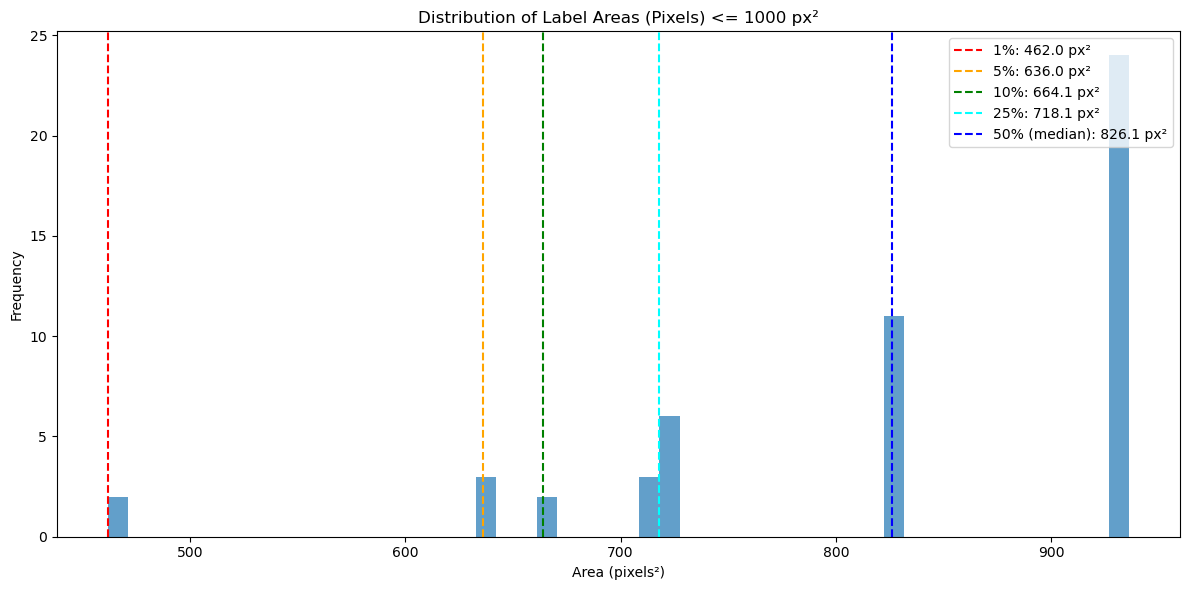

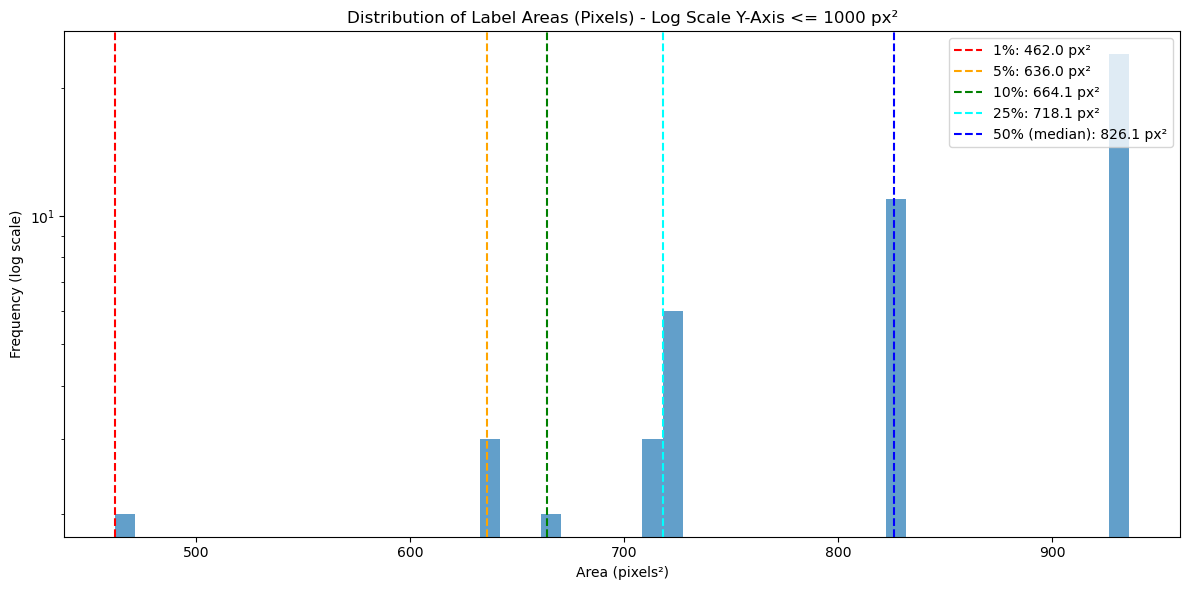

Label area statistics (in pixels²):
  - Count: 51
  - Min: 462.0
  - Max: 936.1
  - Mean: 827.0
  - Median: 826.1
  - 1%: 462.0
  - 5%: 636.0
  - 10%: 664.1
  - 25%: 718.1
  - 50% (median): 826.1


In [13]:
filterer.plot_area_histogram(max_area=1000)

In [14]:
# filterer.plot_area_histogram(class_ids=0, max_area=1000)

In [15]:
# filterer.plot_area_histogram(class_ids=1, max_area=1000)

In [16]:
# filterer.plot_area_histogram(class_ids=2, max_area=1000)

In [17]:
# filterer.plot_area_histogram(class_ids=3, max_area=1000)

In [18]:
# filterer.visualize_smallest_labels(n=1)

In [19]:
# filterer.find_label_by_area(200)

In this case, the decision was made to filter polups at 175 pixels and corals at 200 pixels

In [20]:
filterer.filter_small_labels(
    min_pixel_area=[175, 175, 200, 200], 
    class_ids=[0, 1, 2, 3]
)

Filtering with the following thresholds:
  - Class 0 (Class 0): 175 pixels²
  - Class 1 (Class 1): 175 pixels²
  - Class 2 (Class 2): 200 pixels²
  - Class 3 (Class 3): 200 pixels²
Filtering 3 images in test3_cgras_2024_amag_T01...


Filtering test3_cgras_2024_amag_T01: 100%|██████████| 3/3 [00:00<00:00,  5.18files/s]

Dataset test3_cgras_2024_amag_T01 filtering complete:
  - Processed 3 images
  - Kept 1683 labels, removed 0 labels

Filtering complete:
  - Processed 3 images across 1 datasets
  - Kept 1683 labels, removed 0 labels

Per-class filtering statistics:
  - Class 0 (Class 0): threshold 175 pixels²
    - Processed: 1238
    - Kept: 1238
    - Removed: 0 (0.0%)
  - Class 2 (Class 2): threshold 200 pixels²
    - Processed: 445
    - Kept: 445
    - Removed: 0 (0.0%)

Filtered data saved to /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered/test3


In [21]:
# filterer.visualize_smallest_labels(n=5, use_filtered=True)

In [22]:
# filterer.plot_area_histogram(max_area=1000, use_filtered=True)

# File Splitter
Split the data into train, val, test. This should have some options. It should be able to view the number of images per tile

In [23]:
yaml_path = filterer.new_yaml_path
split_path = f"{output_path}/yolo_filtered_split/{name}"

In [24]:
splitter = DatasetSplitter(yaml_path, split_path)

Found 1 dataset paths in the YAML file
Found 3 images and 3 label files


In [25]:
# splitter.visualize_distribution(fields=["tile"])

Parsing file information...


100%|██████████| 3/3 [00:00<00:00, 12839.71files/s]

Successfully parsed 3 files
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/java/mambaforge/envs/cgras/lib/python3.9/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/c21ff03bf61249a2a6e118038ad4be91-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/c21ff03bf61249a2a6e118038ad4be91-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 37 RHS
At line 45 BOUNDS
At line 49 ENDATA
Problem MODEL has 7 rows, 6 columns and 15 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 3 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0004I processed model has 4 rows, 6 columns (3 integer (3 of which binary)) and 11 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution f

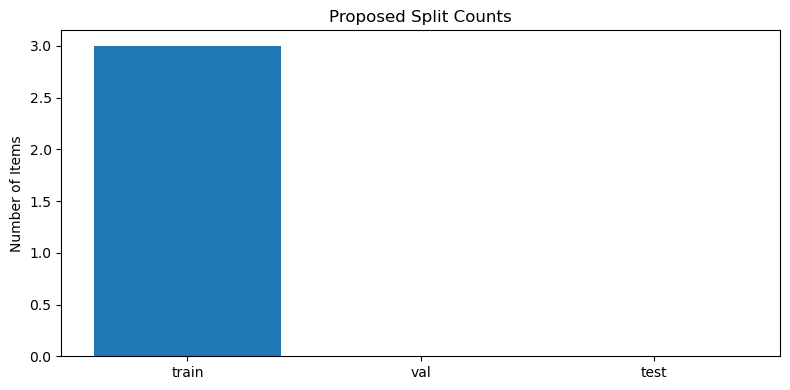

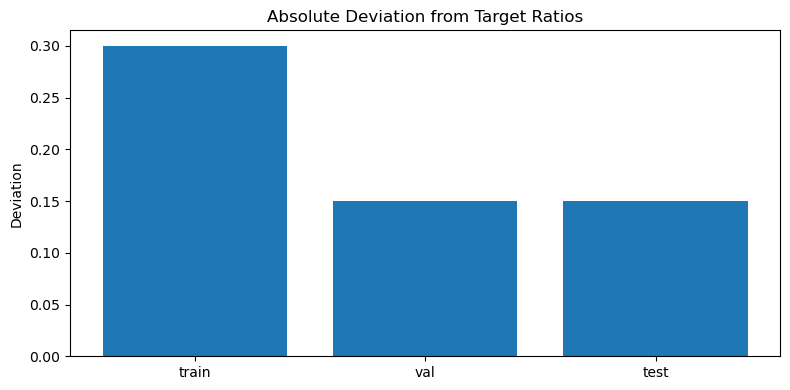

{1: 'train'}

In [26]:
splitter.preview_split(
    split_field="tile",
    train_ratio=0.7, 
    val_ratio=0.15, 
    test_ratio=0.15,
    # stratify_by="week"
)

In [27]:
splitter.create_splits(split_field="tile", train_ratio=0.7, val_ratio=0.15, test_ratio=0.15) #, stratify_by="week"

Creating non-stratified splits using tile
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/java/mambaforge/envs/cgras/lib/python3.9/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/c2288323b7c2479f8d3f146cee6477da-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/c2288323b7c2479f8d3f146cee6477da-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 37 RHS
At line 45 BOUNDS
At line 49 ENDATA
Problem MODEL has 7 rows, 6 columns and 15 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 3 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0004I processed model has 4 rows, 6 columns (3 integer (3 of which binary)) and 11 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc00

{1: 'train'}

The only reason I am not including the stratisfy by week is that it will limit the images used to ensure that the weeks match across the dataset. But this is less important compared to having more data.

In [28]:
splitter.export_splits()

Copying files: 100%|██████████| 3/3 [00:00<00:00, 57.43files/s]

Exported splits to /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split/test3
Created YAML file at /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split/test3/cgras_data.yaml

Export Summary:
  - Train: 3 images (100.0%)
  - Validation: 0 images (0.0%)
  - Test: 0 images (0.0%)


True

## Tiler
This next bit will tile the results.

In [29]:
yaml_path = splitter.new_yaml_path
tiled_path = f"{output_path}/yolo_filtered_split_tiled/{name}"

In [30]:
patcher = ImagePatcher(yaml_path, tiled_path)

Using 20 worker processes
Found 3 dataset paths in the YAML file
Found 3 images in dataset 'train_test3_cgras_2024_amag_T01'


In [31]:
patcher.process_all_datasets()

Processing datasets:   0%|          | 0/1 [00:00<?, ?dataset/s]


Processing dataset 'train_test3_cgras_2024_amag_T01' (3 images) starting from image 0


                                                               
Processing datasets:   0%|          | 0/1 [00:09<?, ?dataset/s]                    

Image CGRAS_Amag_MIS5a_20241105_w1_T01_13.jpg: Success - Created 384 tiles


                                                               
Processing datasets:   0%|          | 0/1 [00:36<?, ?dataset/s]                            

Image CGRAS_Amag_MIS5a_20241112_w2_T01_06.jpg: Success - Created 384 tiles


                                                               
Processing datasets: 100%|██████████| 1/1 [01:00<00:00, 60.40s/dataset]

Image CGRAS_Amag_MIS5a_20241112_w2_T01_15.jpg: Success - Created 384 tiles
Completed dataset 'train_test3_cgras_2024_amag_T01': processed 3 images, created 1152 tiles

DEBUG INFO:
Dataset paths: [('train/test3_cgras_2024_amag_T01/images', 'train_test3_cgras_2024_amag_T01'), ('valid/test3_cgras_2024_amag_T01/images', 'val_test3_cgras_2024_amag_T01'), ('test/test3_cgras_2024_amag_T01/images', 'test_test3_cgras_2024_amag_T01')]
Directory counts: {'train_test3_cgras_2024_amag_T01': 0, 'val_test3_cgras_2024_amag_T01': 0, 'test_test3_cgras_2024_amag_T01': 0}
Processed directories: ['train_test3_cgras_2024_amag_T01_0']

Generated tiled dataset YAML: /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split_tiled/test3/cgras_data.yaml
YAML contents:
train: ['train_test3_cgras_2024_amag_T01_0/images']

Total processing time: 60.41 seconds
Processed 3 images across 1 datasets


## Balance the dataset

In [32]:
yaml_path = patcher.new_yaml_path
balance_path = f"{output_path}/yolo_filtered_split_tiled_balanced/{name}"

In [33]:
balancer = DatasetBalancer(yaml_path, balance_path)

Found 1 dataset paths in the YAML file


In [34]:
balancer.analyze_dataset_balance()

Analyzing dataset balance in train_test3_cgras_2024_amag_T01_0 (split: train)...


Analyzing train_test3_cgras_2024_amag_T01_0: 100%|██████████| 1152/1152 [00:00<00:00, 21730.78files/s]

  - Dataset: train_test3_cgras_2024_amag_T01_0 (split: train)
    - Total images: 1152
    - Non-empty labels: 781 (67.8%)
    - Empty labels: 371 (32.2%)
    - Balanced sample size: 742

Summary by Split Type:
  - Split: train
    - Total images: 1152
    - Non-empty labels: 781 (67.8%)
    - Empty labels: 371 (32.2%)
    - Balanced sample size: 742

Overall Summary:
  - Total images: 1152
  - Non-empty labels: 781 (67.8%)
  - Empty labels: 371 (32.2%)
  - Total balanced sample size: 742


{'train_test3_cgras_2024_amag_T01_0': {'path': 'train_test3_cgras_2024_amag_T01_0/images',
  'split_type': 'train',
  'non_empty': 781,
  'empty': 371,
  'total': 1152,
  'balanced_sample': 742},
 '__overall__': {'non_empty': 781,
  'empty': 371,
  'total': 1152,
  'balanced_sample': 742}}

In [35]:
# balancer.plot_dataset_balance()

In [36]:
balanced_stats = balancer.balance_datasets()


Balancing split: train
Categorizing images for dataset: train_test3_cgras_2024_amag_T01_0...


Categorizing: 100%|██████████| 1152/1152 [00:00<00:00, 22825.50files/s]


Split train has 781 non-empty and 371 empty labels
Copying 742 files to balanced dataset...


Copying: 100%|██████████| 742/742 [00:00<00:00, 778.92files/s]

Split train balanced:
  - Original: 781 non-empty, 371 empty (1152 total)
  - Balanced: 371 non-empty, 371 empty (742 total)
  - Files copied: 742

Balancing complete:
  - Original dataset total: 1152 images
  - Balanced dataset total: 742 images
  - Files successfully copied: 742
  - Balanced dataset saved to: /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split_tiled_balanced/test3
  - YAML file saved to: /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split_tiled_balanced/test3/cgras_data.yaml


## Filter again. Check

In [37]:
yaml_path = patcher.new_yaml_path
filtered_path = f"{output_path}/yolo_filtered_split_tiled_balanced_filtered/{name}"

filterer = ImageFilterer(yaml_path, filtered_path)

Found 1 dataset paths in the YAML file


In [38]:
filterer.analyze_dataset_areas()

Analyzing 1152 images in train_test3_cgras_2024_amag_T01_0...


Processing train_test3_cgras_2024_amag_T01_0: 100%|██████████| 1152/1152 [00:02<00:00, 496.19files/s]

Found 5867 labels in train_test3_cgras_2024_amag_T01_0
Total labels analyzed: 5867


[1162.0,
 715.8333333333285,
 1162.0,
 1092.0,
 1162.0,
 1162.0,
 10518.0,
 2512.0,
 8492.257575757598,
 2512.0,
 8492.257575757627,
 3303.5,
 8528.5,
 3466.0,
 10509.0,
 1345.5,
 1345.5,
 1420.0,
 1420.0,
 1290.0,
 13378.325000000012,
 2324.0,
 2324.0,
 1896.0,
 13789.0,
 1162.0,
 1162.0,
 6543.5999999996275,
 1896.0,
 2311.0,
 2311.0,
 2886.0,
 7209.0,
 2886.0,
 7209.0,
 2512.0,
 2512.0,
 12420.5,
 2512.0,
 2512.0,
 12420.5,
 2512.0,
 2512.0,
 2512.0,
 18964.5,
 2512.0,
 2512.0,
 2512.0,
 2013.5,
 18964.5,
 2013.5,
 3303.5,
 2012.0,
 2012.0,
 636.0,
 8528.5,
 15642.0,
 636.0,
 664.0,
 636.0,
 3466.0,
 2012.0,
 2012.0,
 636.0,
 1582.6666666666679,
 10509.0,
 15642.0,
 636.0,
 664.0,
 636.0,
 2222.0,
 2324.0,
 2324.0,
 2378.0,
 2324.0,
 666.5,
 718.0,
 32186.5,
 2324.0,
 2324.0,
 2378.0,
 2324.0,
 666.5,
 718.0,
 1554.0,
 1840.0,
 1420.0,
 1420.0,
 18616.0,
 12967.5,
 32186.5,
 1554.0,
 1840.0,
 1420.0,
 1420.0,
 1420.0,
 1420.0,
 1420.0,
 1840.0,
 10822.0,
 20680.5,
 18616.0,
 12382.5

Filtering to show only areas <= 1000 pixels² (216/5867 labels, 3.7%)


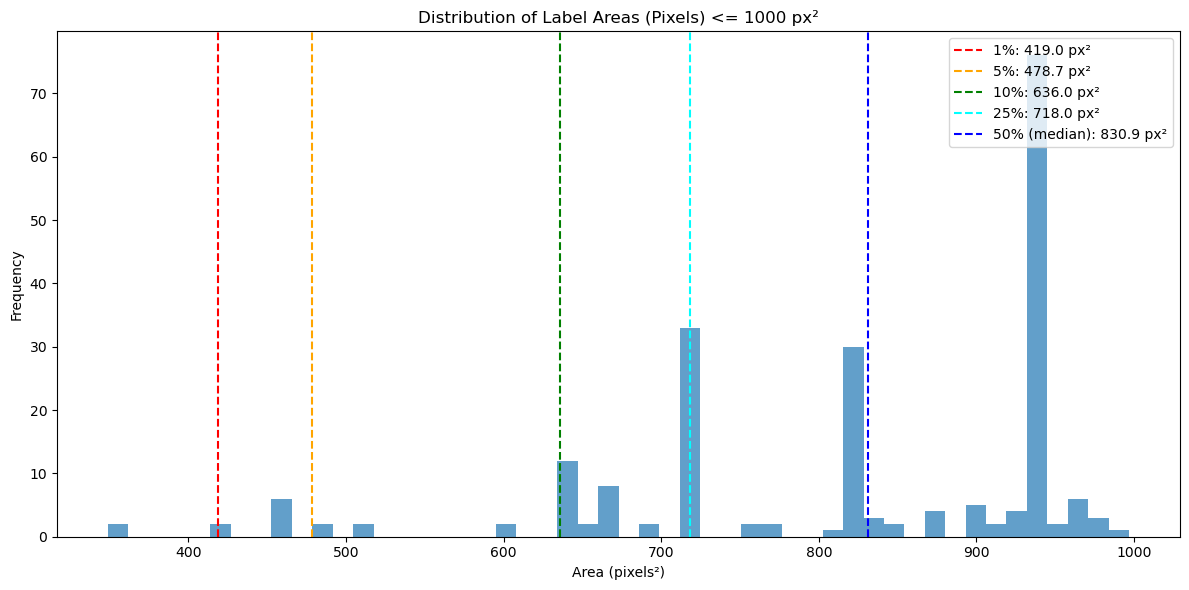

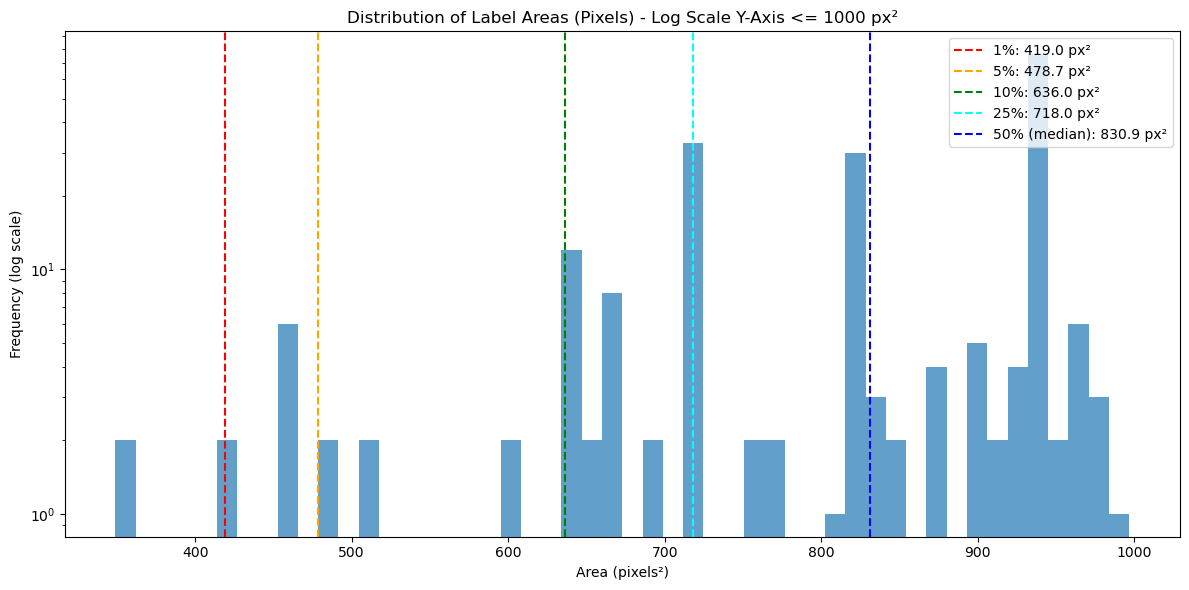

Label area statistics (in pixels²):
  - Count: 216
  - Min: 349.0
  - Max: 996.8
  - Mean: 814.4
  - Median: 830.9
  - 1%: 419.0
  - 5%: 478.7
  - 10%: 636.0
  - 25%: 718.0
  - 50% (median): 830.9


In [39]:
filterer.plot_area_histogram(max_area=1000)